Andy Nguyen, Michael Wolfe, Spencer Fogelman, & Joseph Caguioa

DS 7331.407

Thursday 6:30pm - 8:00pm

# Visualization and Preprocessing of AirBnB Data

In [45]:
# Set-Up
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
import datetime

ModuleNotFoundError: No module named 'plotly'

In [46]:
# Load Data from CSV file as pandas dataframe
df = pd.read_csv('data/airbnb_train.csv')

*Dataset Source: https://www.kaggle.com/rudymizrahi/airbnb-listings-in-major-us-cities-deloitte-ml*

## Business Understanding

This dataset is provided by Kaggle and aims to predict the price of AirBnb listings in major cities in the United States. Each record is one AirBnB listing from 2018 with 29 attributes that describe the listing and what it offers to guests. A linear regression model would be a strong choice for predicting the continuous value of the listing price. This model could be extremely beneficial for new AirBnb hosts to guide them in setting an initial price for their listings based on location, amenities, and other features that they offered with their listing. Furthermore, the price perdiction model could help ensure that AirBnb guests are not overcharged for their stay and that hosts are adequately compensated for their hospitality. The performance of this model would be measured by the root mean square error (RMSE) to determine how far predictions deviate from actual values. Using the RMSE metric is most appropriate within this context because it heavily penalizes large errors and we want to avoid significant prediction errors in listing prices.  


In addition, the rating score from the listing reviews is a potential variable of interest that can predict if a certain listing provided guests with a positive experience during their stay. AirBnB currently employs a "Superhost" program that rewards the hosts with the most experience and highest-rated reviews. A model aimed at classifying review rating scores could provide valuable insight into how AirBnB hosts could improve their hospitality standards and provide a better experience for their guests. It could also help new hosts better market their listings and attain superhost status. We would use misclassification rate as our performance evaluation metric with the goal of maximizing the classficiation accuracy for this type of model. A minimal misclassifcation error rate would adequately captures the attributes influencing highly-rated reviews and be useful to further our understanding of what consumers look for when searching for an AirBnb listing to book.

* **Recall vs. Precision?** I think we should prioritize recall for the context of this classification model.

In [47]:
# Quick snapshot of Data
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",2016-06-18,t,t,NaN,2012-03-26,f,2016-07-18,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,Enjoy travelling during your stay in Manhattan...,2017-08-05,t,f,100%,2017-06-19,t,2017-09-23,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,The Oasis comes complete with a full backyard ...,2017-04-30,t,t,100%,2016-10-25,t,2017-09-14,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,This light-filled home-away-from-home is super...,NaN,t,t,NaN,2015-04-19,f,NaN,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,"Cool, cozy, and comfortable studio located in ...",2015-05-12,t,t,100%,2015-03-01,t,2017-01-22,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


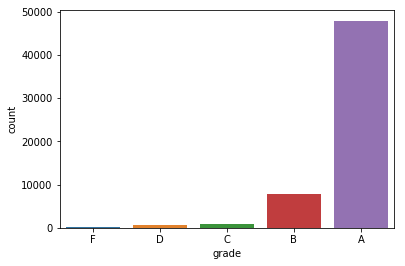

In [48]:
#Creating a categorical variable to predict based on the rating percentage
df['grade'] = pd.cut(df.review_scores_rating, [0,60,70,80,90,101], right=False, labels = ['F', 'D', 'C', 'B', 'A'])
df[['grade', 'review_scores_rating']].head()

#Visuals
sns.countplot(df.grade)

In [49]:
df.groupby('grade').count()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
grade,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
F,249,249,249,249,249,249,249,249,249,249,249,249,248,249,249,162,249,249,248,249,249,249,210,249,249,215,241,249,247
D,598,598,598,598,598,598,596,598,598,598,598,598,598,597,597,379,597,598,598,598,598,598,534,598,598,502,592,598,595
C,872,872,872,872,872,872,869,872,872,872,872,872,872,869,869,717,869,872,872,872,872,872,771,872,872,747,862,867,869
B,7773,7773,7773,7773,7773,7773,7732,7773,7773,7773,7773,7773,7773,7750,7750,6337,7750,7773,7773,7773,7773,7773,7119,7773,7773,6926,7702,7765,7762
A,47897,47897,47897,47897,47897,47897,47784,47897,47897,47897,47897,47897,47897,47783,47783,40408,47783,47897,47897,47897,47897,47897,43709,47897,47897,43202,47315,47840,47854


The data shows that the majority of these listings have been reviewed with a rating score of at least 80 on a scale of 100. Following the typical rating system employed by AirBnb, 75% of these listings were rated at least 4 out of 5 stars.
* 64.6% rated at least 90 out of 100
* 10.5% rated between 80-89 out of 100
* 1.2% rated between 70-79 out of 100
* 0.8% rated between 60-69 out of 100
* 0.3% rated between 0-59 out of 100

**Note: Not all listings in this dataset were given a rating score from reviews. This issue of missing data should be resolved before building a classification model for recommended listings.**

In [50]:
df['price'] = np.exp(df['log_price'])

The objective of the original Kaggle competition was to predict the target variable log(price). We have back-transformed this target variable to the original scale in terms of U.S. dollars ($) for easier interpretation of listing prices.

## Data Meaning Type

In [51]:
# Description of Dataset Variables (74111x29)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 31 columns):
id                        74111 non-null int64
log_price                 74111 non-null float64
property_type             74111 non-null object
room_type                 74111 non-null object
amenities                 74111 non-null object
accommodates              74111 non-null int64
bathrooms                 73911 non-null float64
bed_type                  74111 non-null object
cancellation_policy       74111 non-null object
cleaning_fee              74111 non-null bool
city                      74111 non-null object
description               74111 non-null object
first_review              58247 non-null object
host_has_profile_pic      73923 non-null object
host_identity_verified    73923 non-null object
host_response_rate        55812 non-null object
host_since                73923 non-null object
instant_bookable          74111 non-null object
last_review               582

This dataset originally contains 74,111 records and 29 columns. The addition of the 'grade' and 'price' variable brings the total number of columns to 31 variable.

In [52]:
# Summary Table describing each variable with its measurement scale, data type, brief interpretation of the attribute,
# and the percentage of missing data records

fig = go.Figure(data=[go.Table(
                    header = dict(values = ["Attribute","Measurement Scale",
                                            "Data Type","Description","%datamissing"],
                                  fill_color = 'paleturquoise',
                                  align = 'left'),
                    cells = dict(values = [df.columns, # Attributes
                        # Measurement Scale  
                        ["Nominal","Interval","Nominal","Nominal","Nominal","Interval","Interval",
                        "Nominal","Ordinal","Nominal","Nominal","Nominal","Ordinal","Nominal",
                        "Nominal","Ratio","Ordinal","Nominal","Ordinal","Interval","Interval",
                        "Nominal","Nominal","Interval","Ratio","Nominal","Nominal","Interval",
                        "Interval","Ordinal","Ratio"],
                        # Data Type                    
                        ["int64","float64","object","object","object","int64","float64","object","object",
                        "bool","object","object","datetime","bool","bool","float64","datetime","bool",
                        "datetime","float64","float64","object","object","int64","float64","object",
                        "object","int64","int64","category","float64"],
                        # Description
                        ["Unique Identifier for listing","natural logarithm of the listing price",
                        "The listing's property type (i.e. House, Apartment, Condominium, etc.)",
                        "The type of room provided by the listing (i.e. Private Room, Entire home/apt, etc.)",
                        "Amenities the listing provides (i.e. TV, WIFI, A/C, Parking, Kitchen, etc.)",
                        "Number of guests the listing can accomodate",
                        "Number of bathrooms the listing provides", 
                        "The type of beds the listing provides (i.e. Real Bed, Air Mattress, Futon, etc.)",
                        "Level of cancellation policy regarding refunds for reservations at the listing (i.e. flexible, moderate, strict)",
                        "Does the listing charge a cleaning fee? (i.e. True or False)",
                        "The United States city where the listing is located",
                        "A description of the listing provided by the host",
                        "The date of the listing's first review (e.g. 2017-01-01)",
                        "Does the listing's host provide a profile picture? (i.e. True or False)",
                        "Has the listing's host verified their identification with AirBnb? (i.e. True or False)",
                        "Host's response rate to all guest inquiries (i.e. 0-100%)",
                        "Date when host first listed their property with Airbnb (e.g. 2017-01-01)",
                        "Can the listing be instantly booked (i.e. True or False)",
                        "Date of the listing's last review from an AirBnb guest",
                        "Latitude Coordinates of the listing",
                        "Longitude Coordinates of the listing",
                        "The name identifying the listing in AirBnb property searches",
                        "The neighborhood in the United States where the listing is located",
                        "The number of reviews the listing has received from previous guests",
                        "The AirBnB rating score compiled from all the listing's reviews",
                        "The thumbnail url associated with the listing",
                        "The United States zipcode where the listing is located in",
                        "The number of bedrooms the listing provides",
                        "The number of beds the listing provides",
                        "The grade assigned to the listing based on its reviews rating score",
                        "The listing's price in U.S. dollars ($)"],
                        # %datamissing
                        ["0%","0%","0%","0%","0%","0%","0.3%","0%","0%","0%","0%","0%","21%",
                        "0.3%","0.3%","25%","0.3%","0%","21%","0%","0%","0%","9%","0%","23%",
                        "11%","1.3%","0.1%","0.2%","23%","0%"]],
                                 fill_color = 'lavender',
                                 align = 'left')
)])
fig.show()

NameError: name 'go' is not defined

AirBnb defines their Superhost program as system that rewards Airbnb hosts with the highest-rated reviews and most experience. It offers Superhosts enchanced opportunities to earn extra money, attract more guests, and access to exclusive rewards as incentive to continue providing exceptional hospitality to guests.

The requirements for Superhost eligibility are: a **4.8+ overall rating, 10+ stays, <1% cancellation rate, and 90% response rate**. This criteria establishes our baseline understanding for how these listings and hosts should be recommended to future AirBnb guests.

Given the unbalanced levels of the review rating scores as seen in the grade variable visualization, we will consider extracting a new binary response variable from the data with 96/100 as a potential cutoff threshold (4.8/5 overall stars). This value may be changed to optimize the classification model once we actually begin the training steps.

## Data Quality

We have decided to remove all instances with missing values for review_scores_rating (the variable we will be deriving our categorial response variable from) to avoid any complications introducted into a classification model by imputing values into the target response variable. This results in 57,389 listings remaining, and we believe a dataset of this size provides sufficient information to train a high-performing model.

In [53]:
df_ratings = df.dropna(subset=['review_scores_rating'])

**Variables with Float Data Types**
* log_price, latitude, longitude, review_scores_rating, price

**Variables with Integer Data Types**
* id, accomodates, bathrooms, number_of_reviews, bedrooms, beds

**Categortical Variables (Multiple levels/factors)**
* property_type, room_type, bed_type, cancellation_policy, city, neighbourhood, zipcode, grade

**Variables with Boolean Data Types**
* cleaning_fee, host_has_profile_pic, host_identity_verified

**Variables with Date-Time Data Types**
* first_review, host_since, last_review

**Variables with String Data Types**
* amenities (list of strings), description, name, thumbnail_url


In [54]:
# Data Type Manipulation
# Float Data Types
## Bathrooms is Interval Measurement Scale but Float Data Type to account for 1/2 bathrooms
floats = ['log_price','bathrooms','latitude','longitude','review_scores_rating']
df_ratings[floats] = df_ratings[floats].astype(np.float64)
# Drop % in host_response_rate values and transform to float value (100% = 1.0)
df_ratings["host_response_rate"] = df_ratings["host_response_rate"].str.rstrip('%').astype(np.float64)/100

# Int Data Types
## We are unable to transform the bedrooms and beds variables to an integer data type due to missing values
ints = ['id','accommodates','number_of_reviews','bedrooms','beds']
# df_ratings[ints][df_ratings[ints].notna()] = df_ratings[ints][df_ratings[ints].notna()].astype(np.int64)

# Datetime Types
date_time = ['first_review','host_since','last_review']
df_ratings[date_time] = df_ratings[date_time].apply(pd.to_datetime)

# Bool Types
booleans = ['host_has_profile_pic','host_identity_verified','instant_bookable']
df_ratings[booleans] = df_ratings[booleans].replace({'t':True,'f':False})
df_ratings[booleans] = df_ratings[booleans].astype(np.bool)

# Categorical Features
categorical = ['property_type','room_type','bed_type','cancellation_policy','city','neighbourhood','zipcode']
df_ratings[categorical] = df_ratings[categorical].astype('category')


/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [55]:
df_ratings.drop_duplicates().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57389 entries, 0 to 74110
Data columns (total 31 columns):
id                        57389 non-null int64
log_price                 57389 non-null float64
property_type             57389 non-null category
room_type                 57389 non-null category
amenities                 57389 non-null object
accommodates              57389 non-null int64
bathrooms                 57230 non-null float64
bed_type                  57389 non-null category
cancellation_policy       57389 non-null category
cleaning_fee              57389 non-null bool
city                      57389 non-null category
description               57389 non-null object
first_review              57388 non-null datetime64[ns]
host_has_profile_pic      57389 non-null bool
host_identity_verified    57389 non-null bool
host_response_rate        48003 non-null float64
host_since                57248 non-null datetime64[ns]
instant_bookable          57389 non-null bool
last_rev

There were no duplicate records found after dropping all records with missing values for review_scores_rating.

Missing values for the neighbourhood, zipcode, and thumbnail_url attributes may have been the result of data scraping or collection errors. Since the city, latitude, and longitude variables do not contain missing values, we decided against imputing values for the neighbourhood and zipcode attributes to avoid introducing unnecessary complications into our model. We believe that the city, latitude, and longitude variables provide sufficient information pertaining to the location of the listing. As a result, we will potentially exclude the the neighbourhood and zipcode attributes when training our model. Furthemore, the thumbnail_url attribute does not provide much value in predicting either of our potential target response variables. We will not impute values for the missing data and will also exclude this attribute when training our model.

In [56]:
# Record with missing value for first_review and last_review
df_ratings[df_ratings.first_review.isna()]

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,grade,price
33984,7765579,4.59512,House,Private room,"{TV,""Wireless Internet"",Kitchen,""Free parking ...",2,1.0,Real Bed,strict,True,NYC,"Our super comfortable, clean and cool room, wi...",NaT,True,True,1.0,2013-09-29,False,NaT,40.663137,-73.932994,The Heights Rentals III,East Flatbush,1,20.0,https://a0.muscache.com/im/pictures/632b80ab-d...,11203.0,1.0,1.0,F,99.0


The record with the missing value for first_review and last_review is the same (id#33984 - Name: "The Heights Rentals III"). A closer look at this data record shows that it only has one review with a review_scores_rating of 20. Given that this dataset has been most recently updated in 2018 and the host originally listed the property on 2013-09-29, we have reason to believe that this AirBnb listing is no longer active and that those data values were inaccesible. We will consider dropping this record from the dataset when training our models.

In [57]:
# Impute Missing Values of host_since variable with first_review data value from same record
df_ratings.host_since[df_ratings.host_since.isna()] = df_ratings.first_review[df_ratings.host_since.isna()]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:7620: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


We believe that the listings with missing values for the host_since variable may be the result of a host that has multiple AirBnB listings where the data value for this particular attribute is only associated with the first listing they originally began hosting through AirBnb. We found that a suitable strategy to address these missing values would be to impute them with the value from the first_review variable for that corresponding listing. The best estimate to minimize the loss of information from missing values of the host_since variable would be the date of the first review because these two attributes should be intuitively close in time. An imputation based on statistical averages such as mean, median, or mode would be arbitrary and may even conflict with the information provided from the first_review data value. For example, it would not make sense to impute a date for the host_since variable for a certain listing that is more recent in time than its first_review date value.

The missing values for the bathrooms, bedrooms, and beds attributes may have been a result of host input error. We believe that the hosts for these respective listings forgot to include this data when posting their property as an AirBnb listing. Thus, resulting in the omission of this information in the dataset for these certain listings. Based on our reasoning, we believed that the best imputation method for these missing values should be based on the property type and the number of guests the listing can accomodate. These variables generally provide a great determination of how many bathrooms, bedrooms, and beds are avaiable with the AirBnb listing. We decided to impute these missing values with the median because the mean value would not be a whole number and would thus not make sense in the context of bedrooms or beds.

In [58]:
# Code to determine missing values and imputation value for bathrooms by property type and accommodation number
## df_ratings[df_ratings.bathrooms.isna()].groupby(["property_type","accommodates"])["property_type"].count()
## df_ratings.groupby(["property_type","accommodates"])['bathrooms'].describe()

# Code to determine missing values and imputation value for bedrooms by property type and accommodation number
## df_ratings[df_ratings.bedrooms.isna()].groupby(["property_type","accommodates"])["property_type"].count()
## df_ratings.groupby(["property_type","accommodates"])['bedrooms'].median()

# Code to determine missing values and imputation value for beds by property type and accommodation number
## df_ratings[df_ratings.beds.isna()].groupby(["property_type","accommodates"])["property_type"].count()
## df_ratings.groupby(["property_type","accommodates"])['beds'].median()

In [59]:
# Impute Missing Values of Bathroom Variable
df_imputed = df_ratings
df_imputed["bathrooms"] = df_imputed["bathrooms"].fillna(df_imputed.groupby(["property_type","accommodates"])["bathrooms"].apply(lambda x : x.fillna(x.median())))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


**Impute Missing Values for Bathrooms with median values based on Property Type & Accomodates**
* 159 missing values for bathrooms
    * Impute Apartments accommodating (1-5) w/ 1 bathroom (100 values)
    * Impute Bed & Breakfast accommodating (1-2) w/ 1 bathroom (3 values)
    * Impute Camper/RV accomodating 2 w/ 1 bathroom (1 value)
    * Impute Dorm accomodating (1-2) w/ 1 bathroom (8 values)
    * Impute House accomodating (1-4) w/ 1 bathroom (39 values)
    * Impute House accomodating 6 w/ 2 bathrooms (1 value)
    * Impute House accomodating 8 w/ 2.5 bathrooms (1 value)
    * Impute House accomodating 16 w/ 3 bathrooms (1 value)
    * Impute Loft accomodating 2 w/ 1 bathroom (1 value)
    * Impute Other accomodating (2-4) w/ 1 bathroom (4 values) 

In [60]:
# Impute Missing Values of Bedrooms Variable
df_imputed["bedrooms"] = df_imputed["bedrooms"].fillna(df_imputed.groupby(["property_type","accommodates"])["bedrooms"].apply(lambda x : x.fillna(x.median())))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


**Impute Missing Values for Bedrooms with median values based on Property Type & Accomodates**
* 70 missing values for bedrooms
    * Impute Apartments accomodating (1-4) w/ 1 bedroom (57 values)
    * Impute Bungalow accomodating 3 w/ 1 bedroom (1 value)
    * Impute House accomodating 2 w/ 1 bedroom (7 values)
    * Impute House accomodating 6 w/ 3 bedroom (1 value)
    * Impute Loft accomodating 4 w/ 1 bedroom (3 values)
    * Impute Other accomodating 1 w/ 1 bedroom (1 value)

In [61]:
# Impute Missing Values of Beds Variable
df_imputed["beds"] = df_imputed["beds"].fillna(df_imputed.groupby(["property_type","accommodates"])["beds"].apply(lambda x : x.fillna(x.median())))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


**Impute Missing Values for Beds with median values based on Property Type & Accomodates**
* 62 missing values for beds
    * Impute Apartments accomodating (1-3) w/ 1 bed (38 values)
    * Impute Apartments accomoodating 4 w/ 2 beds (1 value)
    * Impute Condominium accomodating 2 w/ 1 bed (1 value)
    * Impute Dorm accomodating 1 w/ 1 bed (1 value)
    * Impute Guesthouse accomodating 1 w/ 1 bed (1 value)
    * Impute House accomodating (1-2) w/ 1 bed (14 values)
    * Impute House accomodating 3 w/ 2 beds (1 values)
    * Impute House accomodating 5 w/ 3 beds (1 value)
    * Impute House accomodating 16 w/ 8 beds (1 value)
    * Impute Other accomodating (1-2) w/ 1 bed (2 values)
    * Impute Townhouse accomodating 2 w/ 1 bed (1 value)

In [62]:
# Impute Missing Values of host_response_rate Variable
df_imputed["host_response_rate"] = df_imputed["host_response_rate"].fillna(df_imputed.groupby(["number_of_reviews"])["host_response_rate"].apply(lambda x : x.fillna(x.mean())))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


We found that most of the missing values for the host_response_rate variable came from listings that only had a few reviews. This suggests that these first few guests may have not interacted with the host much so there is not enough information to provide data regarding the host_response_rate for these listings. We decided to impute these missing values with the mean based on the number of reviews and avoid using the review_rating_score data since it is a potential target variable we could predict.

In [63]:
# We can now change bedrooms and beds data type to integers now that we have addressed the missing values
df_imputed[ints] = df_imputed[ints].astype(np.int64)
df_imputed.info()

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


<class 'pandas.core.frame.DataFrame'>
Int64Index: 57389 entries, 0 to 74110
Data columns (total 31 columns):
id                        57389 non-null int64
log_price                 57389 non-null float64
property_type             57389 non-null category
room_type                 57389 non-null category
amenities                 57389 non-null object
accommodates              57389 non-null int64
bathrooms                 57389 non-null float64
bed_type                  57389 non-null category
cancellation_policy       57389 non-null category
cleaning_fee              57389 non-null bool
city                      57389 non-null category
description               57389 non-null object
first_review              57388 non-null datetime64[ns]
host_has_profile_pic      57389 non-null bool
host_identity_verified    57389 non-null bool
host_response_rate        57388 non-null float64
host_since                57389 non-null datetime64[ns]
instant_bookable          57389 non-null bool
last_rev

## Simple Statistics

In [64]:
df_imputed.describe()

,id,log_price,accommodates,bathrooms,host_response_rate,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds,price
count,5.738900e+04,57389.000000,57389.000000,57389.000000,57388.000000,57389.000000,57389.000000,57389.000000,57389.000000,57389.000000,57389.000000,57389.000000
mean,1.125208e+07,4.749232,3.218247,1.225967,0.952632,38.485767,-92.352714,26.957326,94.067365,1.260904,1.737546,147.748297
std,6.082797e+06,0.668700,2.144154,0.561473,0.122001,3.085702,21.670682,41.043449,7.836556,0.841280,1.265311,134.512852
min,3.440000e+02,0.000000,1.000000,0.000000,0.000000,33.338905,-122.511500,1.000000,20.000000,0.000000,0.000000,1.000000
25%,6.248838e+06,4.304065,2.000000,1.000000,0.940000,34.127760,-118.340924,3.000000,92.000000,1.000000,1.000000,74.000000
50%,1.222387e+07,4.700480,2.000000,1.000000,1.000000,40.668884,-76.995077,11.000000,96.000000,1.000000,1.000000,110.000000
75%,1.639709e+07,5.164786,4.000000,1.000000,1.000000,40.749182,-73.954325,33.000000,100.000000,1.000000,2.000000,175.000000
max,2.123090e+07,7.600402,16.000000,8.000000,1.000000,42.390437,-71.000261,605.000000,100.000000,10.000000,18.000000,1999.000000


The above call provides summary statistics on all integer and float variables. For ID, latitude, and longitude, these are not particularly meaningful.

As aforementioned, log(price) was not easily interpretable and the log scale obscures some interesting details more readily apparent in the derived price variable. For one, the cheapest named price is one dollar. The actual cities where these postings were taken from, discussed in a later section, are typically expensive tourist destinations. Very cheap prices are not unheard of, and while this could be a data collection error, the other columns associated with the entry seem legitimate.

In [65]:
df_imputed.loc[df['price'] == 1]

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,grade,price
11632,17972519,0.0,Condominium,Shared room,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",1,1.0,Real Bed,strict,True,NYC,Comfortable dwellings .. My comfy home is for ...,2017-08-17,True,False,1.0,2017-07-20,True,2017-10-01,40.838054,-73.858665,Esteem's Place,Parkchester,3,87.0,https://a0.muscache.com/im/pictures/71bc085f-b...,10462,1,1,B,1.0


In [66]:
df_imputed.loc[df['price'] > 1995].head(3)

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,grade,price
42672,16755372,7.600402,Apartment,Entire home/apt,"{Internet,""Wireless Internet"",""Air conditionin...",2,1.0,Real Bed,moderate,True,NYC,1st Floor Loft with your own private entrance....,2015-04-10,True,False,0.967284,2013-05-23,False,2015-08-20,40.728233,-73.989335,Huge Loft with Private Entrance,East Village,20,85.0,https://a0.muscache.com/im/pictures/27238343/0...,10003,1,1,B,1999.0
55453,14095274,7.600402,Townhouse,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",7,3.5,Real Bed,strict,True,NYC,King's Palace is just off the gold coast in Gr...,2017-09-14,True,False,0.800000,2017-08-26,True,2017-09-14,40.733003,-73.994126,Royal Manor!!!,Greenwich Village,1,80.0,https://a0.muscache.com/im/pictures/5d3b16c4-5...,10003,4,4,B,1999.0
61826,20230917,7.598399,Villa,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",16,7.5,Real Bed,strict,True,LA,Villa Tramonto is available for long term rent...,2015-01-09,True,True,0.910000,2013-04-18,True,2017-04-30,34.042871,-118.556838,"Ocean View Villa, 12,000 sq.ft.",Pacific Palisades,15,98.0,https://a0.muscache.com/im/pictures/51059902/7...,90272,7,16,A,1995.0


On the other end of the scale is the maximum price, at nearly two thousand dollars per night. Multiple properties aim to differentiate themselves with such a high price point, likely for a correspondingly luxurious experience. Predictably, considering that AirBnB guests generally aim to save money on accommodations, these properties are in low demand, most with no reviews at the point of collection. Overall the average per-night cost sits near \\$160 with the 75th percentile at \\$185. This hammers home how competitive pricing is, as well as where AirBnB trends on the pricing scale compared to other lodging options such as hostels and hotels.

In terms of rooms this dataset's properties provide, on average, 1-2 bedrooms with 1-2 beds and access to one bathroom. The mean value for the accommodates variable sits slightly higher at three, suggesting most provided beds are doubles. Some anomalous entries exist here as well, such as postings for entire homes with at least one bed yet bedrooms at zero, or a handful of entries describing zero real beds. These are likely errors or misunderstandings on the part of the host.

Reviews are discussed further alongside graphs to better visualize distributions related to their quantity and score, but the summary statistics alone provide some insight as well. The median number of reviews is 6, a relatively low number that could be attributable to some combination of unreviewed listings, the fact that not all guests write reviews, and the part-time side gig nature of AirBnB for some hosts. Average ratings out of 100 look overwhelmingly high, with the 25th percentile being 92.

## Visualize Attributes

In [67]:
# Import visualization packages
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Density')

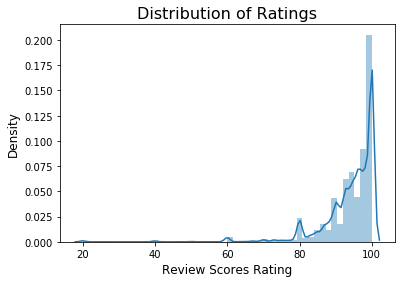

In [68]:
# Histogram for review_scores_rating, a float
sns.distplot(df_imputed['review_scores_rating'])
plt.title('Distribution of Ratings', fontsize=16)
plt.xlabel('Review Scores Rating', fontsize=12)
plt.ylabel('Density', fontsize=12)

Plotting the ratings reveals a long left tail, with most ratings concentrated in the 80-100 score range. This is likely due to AirBnb's rating system, where guests rate their stay on a scale of 1 to 5 stars. Furthermore, properties that fall below a certain rating average get delisted. Combined, this likely results in an artificially biased sample where consistently strong performers are overrepresented. This is explored further in a later section.

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Density')

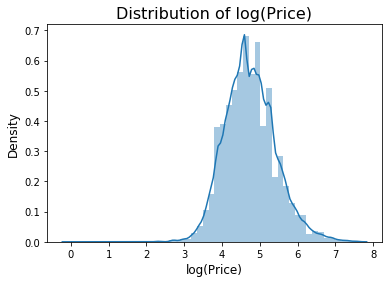

In [69]:
sns.distplot(df_imputed['log_price'])
plt.title('Distribution of log(Price)', fontsize=16)
plt.xlabel('log(Price)', fontsize=12)
plt.ylabel('Density', fontsize=12)

Plotting the log(price) reveals a slight left tail, but otherwise presents a normal distribution. The distribution is centered at the mean value of 4.749232 which translates to roughly $115 with a standard deviation of roughly 2 U.S. dollars. We can proceed with confidence that the normality assumption will not be violated when building a linear regression model to predict log(price).

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


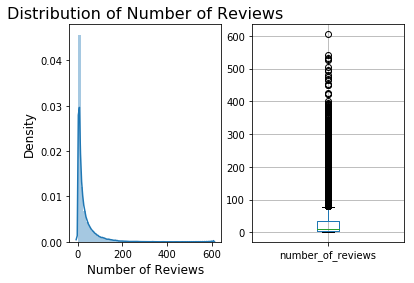

In [70]:
# Histogram
plt.subplot(1,2,1)
sns.distplot(df_imputed['number_of_reviews'])
plt.title('Distribution of Number of Reviews', fontsize=16)
plt.xlabel('Number of Reviews', fontsize=12)
plt.ylabel('Density', fontsize=12)

#BoxPlot
plt.subplot(1,2,2)
df_imputed.boxplot("number_of_reviews")

Plotting the number of reviews reveals a long right tail, with most listings concentrated in the range of 0-33 reviews. This is most likely the result of new listings, and perhaps a rise in popularity of hosts seeking to list their property with AirBnb in recent years. It also informs us that few hosts have been successful in capitalizing on the AirBnB service in these major U.S. cities to date since fewer than 25% of the listings in from this dataset have more than 33 reviews.

Text(0,0.5,'Frequency')

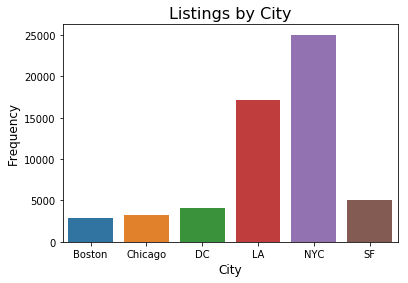

In [71]:
# Bar graph for city, a factor
sns.countplot(x="city", data=df_imputed)
plt.title('Listings by City', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

This bar graph gets a sense for counts and relative representation in the pared down dataset. Most postings are taken from New York City or Los Angeles, which, combined, constitute nearly 75% of the imputed data. Considering that the six represented are large urban cities, it is possible that any eventual findings may not hold up well in smaller cities or more rural destinations.

Text(0,0.5,'Frequency')

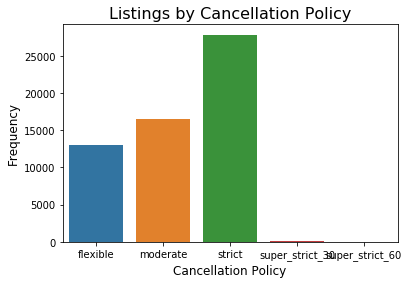

In [72]:
# Bar graph for Cancellation Policy, a factor
sns.countplot(x="cancellation_policy", data=df_imputed)
plt.title('Listings by Cancellation Policy', fontsize=16)
plt.xlabel('Cancellation Policy', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

A bar graph of the cancellation policy shows that most listings force a strict cancellation policy, but very few force policies beyond that. Considering that a requirment for "Superhost" status is less than 1% cancellations, it makes sense that more hosts would rather force a strict or moderate cancellation policy over a flexible. This variable is an interesting variable to monitor moving forward with new incoming data because it may have potential role in predicting review score ratings given guests may experience unforeseen circumstances causing them to cancel reservations.

Text(0.5,1,'Host Has Profile Picture')

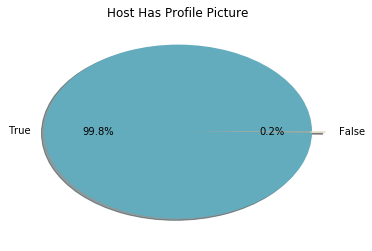

In [85]:
# Pie chart of host_has_profile_pic, a binary variable
explode_profile = (0, 0.1)
labels_profile = ("True", "False")
profile_pics = df_imputed['host_has_profile_pic'].value_counts()
plt.pie(profile_pics, explode=explode_profile, labels=labels_profile,
       autopct='%1.1f%%', shadow=True, colors=('#63ACBE', '#CCBE9F'))
plt.title('Host Has Profile Picture')

While pie charts are oft maligned because it is difficult to visually interpret comparative proportions by size, especially with angles, the problem is not as apparent when only comparing two levels, such as the percentages a binary variable takes.

Seeing a human face on a previously anonymous host could have some effect on whether a disgruntled guest leaves a bad review that brings down a property's rating. (Not all Airbnb guests actually meet the property owner in person during their stay.) However, such a detail likely goes unstudied with this dataset because the overwhelming majority (99.8%) of hosts have a picture on their profile.

Text(0.5,1,'Host Identity Verified')

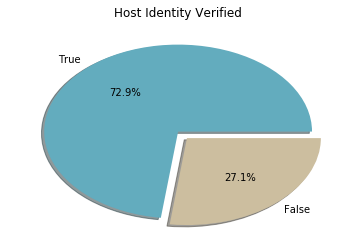

In [84]:
# Pie chart of host_identity_verified
identity_verified = df_imputed['host_identity_verified'].value_counts()
labels_verified = ("True", "False")
explode_verified = (0, 0.1)
plt.pie(identity_verified, autopct='%1.1f%%', explode=explode_verified,
       labels=labels_verified, shadow=True, colors=('#63ACBE', '#CCBE9F'))
plt.title('Host Identity Verified')

However, at least 1/4 of the hosts in this reduced dataset do not have their identity verified. This is rather curious, considering that safety is a two-way street; it would make sense for all parties involved to have their identifications verified.

(-0.5, 399.5, 199.5, -0.5)

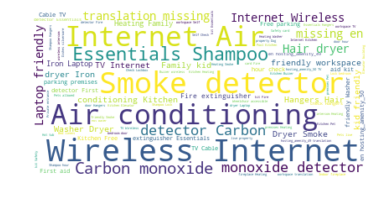

In [98]:
# Basic exploratory wordcloud for uncleaned amenities, a dict variable of strings
from wordcloud import WordCloud
text = " ".join(amenity for amenity in df_imputed.amenities)
wordcloud = WordCloud(background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

The amenities variable in the dataset likely takes a list of checkmarked items that host select as applicable to their property and turns it into a dictionary object. This basic word cloud takes all amenities in the imputed dataset and generates an image where the most commonly occurring amenities are represented with larger text. The top features properties seem to offer (with similar ones grouped together), include:

* (wireless) Internet to allow people the ability to work or find information about the city they are staying in
* Air conditioning, for the comfort of temperature control
* Smoke and carbon monoxide detectors, safety features that provide peace of mind against dangerous situations

Note that without cleaning, there are stray strings that don't provide any useful information, such as "translation missing."

## Explore Joint Attributes

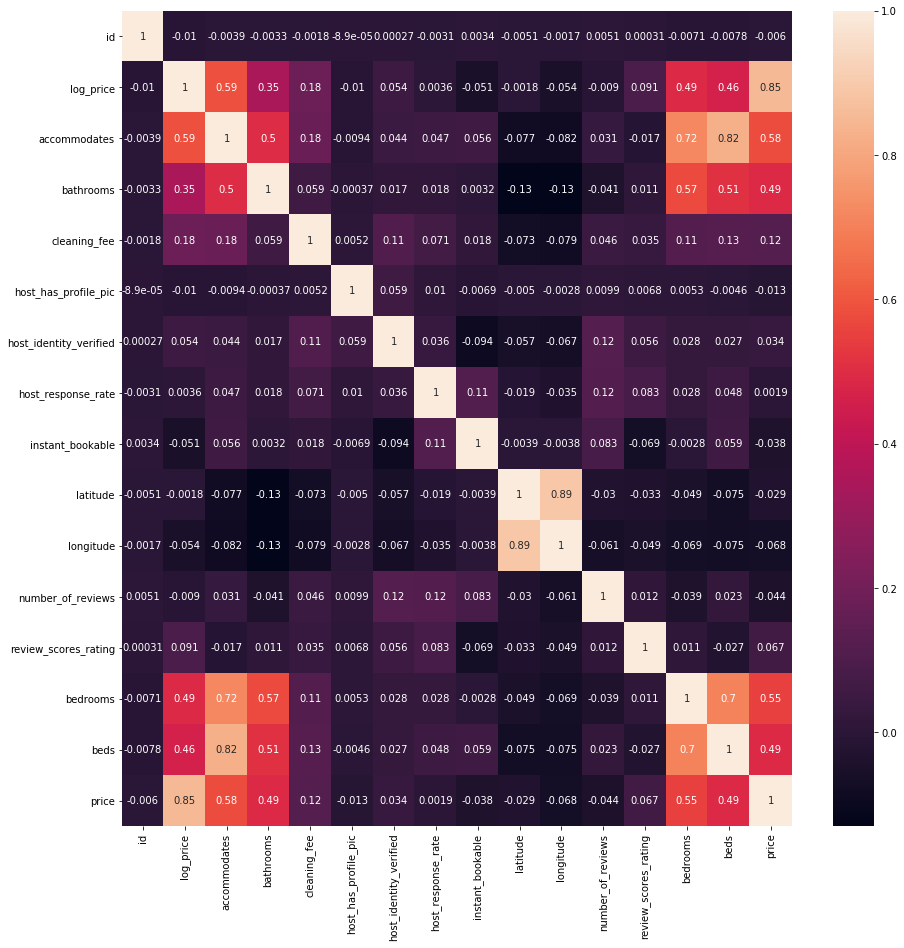

In [75]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(15,15)) 
corr = df_imputed.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           annot=True,
           ax=ax)

A heatmap of all the attributes reveals a few positive correlations between certain attributes. For example, the accommodation counts correlate positively with bed count, bathroom count, and bedroom count. This makes logical sense as a listing which accommodates more customers would naturally need more space for said customers. There is also some correlation (0.59) between log price and accommodation. Let's try a deeper dive.

**NOTE: Our decision to impute the missing values for host response rate based on the number of reviews is supported by the fact that it was the most correlated variable. However, it does not present a strong correlation with the host response rate with a value of only 0.12.**

In [ ]:
# Scatterplot Matrix for visualization of accommodates, bathrooms, bedrooms, and beds
sns.pairplot(data = df_imputed, vars = ["accommodates","bathrooms","bedrooms","beds"], kind = "reg")

A deeper look at the relationship with acommodation number presents a better understanding of our imputation method for the missing values in the bathrooms, bedrooms, and beds variables. The scatterplot matrix presents a linear relationship between these variables, suggesting that the number of bathrooms, bedrooms, and beds will increase with the number of people a listing can accomodate. This visualization supports the correlation values of accommodation provided in the heatmap above with 0.5, 0.72, and 0.82 for bathrooms, bedrooms, and beds respectively. We generally found that any listing that accomodates up to 2 people will only provide at most 1 bathrooms, 1 bedroom, and 1 bed.

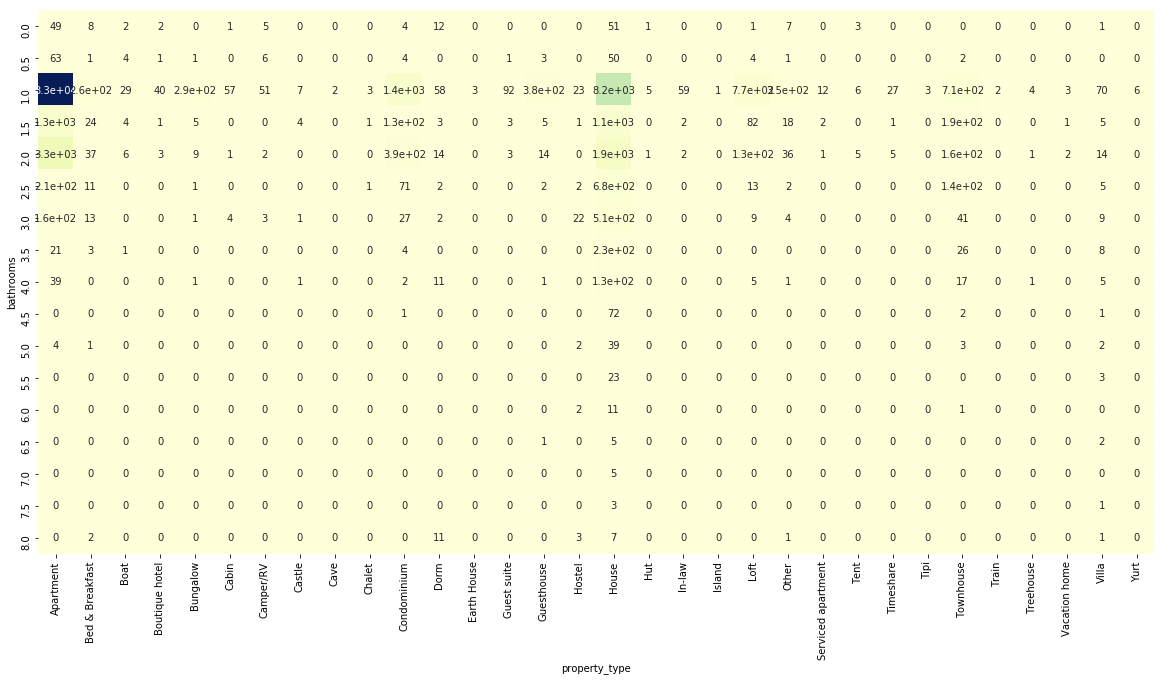

In [77]:
# Cross-Tabulation of Bathrooms with Property Type to provide understanding of Imputation Method
PropertyAccommodates_Bathrooms = pd.crosstab(df_imputed.bathrooms,df_imputed.property_type)
plt.subplots(figsize=(20,10))
sns.heatmap(PropertyAccommodates_Bathrooms, cmap = 'YlGnBu', annot = True, cbar = False)

We additionally accounted for property_type when imputing the missing values for bathrooms, bedrooms, and beds. We believed that the additional space with larger property_types also influenced the number of bathrooms, bedrooms, and beds provided in a listing. For example, house listings are more likely to provide more bathrooms than an apartment listing. A quick look shows that most property_types will provide no more than 4 bathrooms, which supports our decision to impute these missing values based on both accommodation number and property type. 

**Note: We only provided a cross-tabulation visualization on bathroom variable to avoid redundancy with bedrooms and beds since the bathrooms variable had the most missing values. Cross-tabulation visulizations for the other variables can easily be outputted by replacing df_imputed.bathrooms with either df_imputed.bedrooms or df_imputed.beds.**

## Explore Attributes & Class

The target class(es) we are considering in this section are log_price (and its derivative price) and rating, which is involved with superhost.

In [78]:
sns.scatterplot('log_price', 'accommodates', data=df_imputed)

AttributeError: module 'seaborn' has no attribute 'scatterplot'

Scatter plot of price and accommodations

The price appears to cluster higher for larger accommodations; however, there are some outliers - one value appears to have a price and accommodation of 0.

Earlier we created a host grade attribute, and were examining the impact of verification on the grade. Let's see how grade affects price.

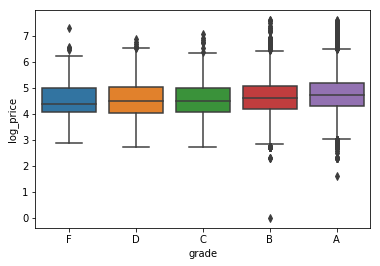

In [79]:
sns.boxplot('grade', 'log_price', data=df_imputed)

The mean price appears to increase with higher grades, but there are a lot of outliers - namely some very low grade hosts with expensive listings, and a few B grade hosts with a price of 0. Let's try intersecting host verification with these same attributes and see how that changes things.

In [ ]:
gradeVerify_price = pd.crosstab([df_imputed['host_identity_verified'],df_imputed['grade']], df_imputed.log_price.mean())
gradeVerify_price.plot(kind='bar', stacked=True, color = 'Blue')

Cross-tabulation of grade and verification with price

It appears the interaction of verification and price have an impact on price. As we saw before, grade pulls price higher, but verification appears to have much stronger leverage on the overall price. Now let's try the same exercise with city.

In [ ]:
sns.boxplot('city', 'log_price', data=df_imputed)

Again we see the outlier in NYC that has a price of 0. It appears that San Francisco and Boston have the highest average price, with LA and Chicago being the lowest. Let's try interacting with grade.

In [ ]:
gradeCity_price = pd.crosstab([df_imputed['city'],df_imputed['grade']], df_imputed.log_price.mean())
gradeCity_price.plot(kind='bar', stacked=True, color = 'Red')

Again we see grade has a higher average. Interestingly, the average for all cities appears to be the same acress grades except A grades for LA and NYC, which have much higher averages prices than both other grades and other cities.

In [ ]:
# Scatterplot between rating and number of reviews
sns.regplot(x='review_scores_rating', 
            y='number_of_reviews',
            data=df_ratings,
            scatter_kws={'alpha':0.1})
plt.title('Reviews: Quantity and Average', fontsize=16)
plt.xlabel('Review Scores Rating', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)

Due to the sheer amount of data, introducing transparency to individual points in the scatterplot helps show some nuance about the distribution. While the concentration of scores in the 70-100 score range is high, there are also darkened overlapping concentrations on the lower end. This is likely an artifact of the 5-star scoring system, which suggests a decent number of properties had an average of 1, 2, 2.5, or 3 stars.

As suggested earlier, properties that maintain high-quality as judged by guests are permitted to remain listed on AirBnB, resulting in said properties continuing to accumulate reviews. While one interpretation is that guests simply filter for highly rated properties, it is more likely that poor performers get a limited opportunity to get their act together before being dropped in order to maintain quality across the site.

In [ ]:
np.average(df_ratings['number_of_reviews'], weights=(df_ratings['review_scores_rating'] <= 60))

In [ ]:
(df_ratings['review_scores_rating'] <= 60).sum()

Some quick calculations show that listings earning 3 stars and below usually had only 1-2 reviews.

In [ ]:
# Violin plots of price by city
sns.violinplot(x="city", y="price", data=df_ratings)
plt.title('Price by City', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Price, USD', fontsize=12)

Violin plots of untransformed price among the six cities in the dataset reveals long tails caused by the expensive outliers. All six cities have at least one listing going for around \\$1,500 a night. In order to better see the data, we can cut down to a value slightly above the 75th percentile at \\$185.

In [ ]:
# Violin plots of price by city, removing outliers
sns.violinplot(x="city", y="price", data=df_ratings[df_ratings.price < 300])
plt.title('Closer Look at Price by City', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Price, USD (axis zoomed in)', fontsize=12)

This view enables us to see the slightly higher price distribution of San Francisco and the higher density of sub-\\$100 postings in New York City, Los Angeles, and Chicago.

In [ ]:
plt.figure(figsize = (10, 200))
sns.boxplot(x="log_price", y="neighbourhood", hue="city", data=df_ratings,
           width=0.8, fliersize=2, dodge=False)

Plotting log(price) against neighborhood names is an easier visualization to handle than using regular price. Of note, some neighborhood names have two or more box colors appear (*e.g.*, Downtown, Chinatown), which makes sense because the same neighborhood name can be shared across different cities.

## New Features

Additional potential features could be engineered from existing attributes or derived from the original AirBnB listings.

* As discussed previously, we dervied the price variable from the original log(price) target variable for easier human interpretation and business relevance.
* We also dervied a grade variable from the review scores as a potential target variable to base a classification model on. A barplot visualization showed a heavy data imbalance favoring A's or ratings above 90%.
    * Based on that finding, we may want to engineer a new feature as the target response variable that a classification model can better discriminate based on the given data. As previously mentioned in the Data Meaning Type section, we will consider a rating score cutoff of 96% as a potential threshold (4.8/5 overall stars). However, this value may be changed to optimize the classification model once we actually begin the training steps. 
* A general sense for the size of the listing could be obtained from principal component analysis on accommodates, bathrooms, bedrooms, and beds. This would also likely need to account for the property and room type factors, which mention what kind and how much of the property is available to guests.
* Clustering could be performed using some combination of latitude, longitude, city, and neighborhood to get a sense for pricing trends based on physical location.
* On a related note, hosts frequently use description and name to advertise a property's proximity to popular tourist destinations, public transportation, or restaurants and nightlife. Sentiment analysis on the significance of a property's physical location could give clues about pricing.
    * For a less subjective alternative, one could bring in the latitude-longitude coordinates of known highlights in a given city and then calculate distance from the property. This could be captured in binary variables, such as whether a property is located within 0.25 miles of a public transport stop or within a city's tourist district.
* Current variables related to reviews are about quantity, scores, or dates. Sentiment analysis could be performed on select reviews (e.g., first, most recent, highest rating, lowest rating) to gain an understanding of why certain guests submitted a given score. For example, perhaps a listing's major strength is its host, and multiple reviews mention the host's hospitality and knowledge about the area. Such details are not currently captured by host-related variables in the dataset. 
    * Review text may also support a host's claims made about proximity in the description and name.

## Exceptional Work

In [ ]:
#New attributes by exploring the attributes column
df['internet'] = df.apply(lambda row: 'internet' in row.amenities.lower(), axis=1)
print(df[['internet', 'amenities']].head())

df['TV'] = df.apply(lambda row: 'tv' in row.amenities.lower(), axis=1)
print(df[['TV', 'amenities']].head())

df['air_conditioning'] = df.apply(lambda row: 'air conditioning' in row.amenities.lower(), axis=1)
print(df[['air_conditioning', 'amenities']].head())

df['kitchen'] = df.apply(lambda row: 'kitchen' in row.amenities.lower(), axis=1)
print(df[['kitchen', 'amenities']].head())

df['pool'] = df.apply(lambda row: 'pool' in row.amenities.lower(), axis=1)
print(df[['pool', 'amenities']].head())

df['parking'] = df.apply(lambda row: 'parking' in row.amenities.lower(), axis=1)
print(df[['parking', 'amenities']].head())

#We will also make a new price variable that is not logged
df['price'] = np.exp(df['log_price'])

We would also like to propose the following items, performed in the above sections, as candidates deserving of exceptional work points:

* The imputation strategy to clean out missing values